In [1]:
%matplotlib widget
# %matplotlib qt
import matplotlib.pyplot as plt
import numpy as np
import bmcs_utils.api as bu
from bmcs_cross_section.api import MKappa, TShape, EC2, BarLayer, ReinfLayer
from bmcs_beam.api import SLSParamStudy, BoundaryConditions, BoundaryConfig, DeflectionProfile, BeamDesign, BeamSLSCurve, LoadDeflectionParamsStudy
from mpl_toolkits import mplot3d


$q_{GZT}$ = F_u in the code\
$q_{GZG}$ = F_s in the code\
$\gamma_{carbon}$ 1.3/(0.85*0.9)

In [ ]:
fig, ax = plt.subplots()
b_sls.plot_with_ec2_curves(b_sls.F_u_grid, b_sls.F_s_grid, b_sls.rho_grid, b_sls.sl_grid, ax)
fig
fig.savefig('biegeversuche_properties_300_100_section_4pb.pdf')

In [5]:
b_sls = BeamSLSCurve(f_ck = 30, use_f_ctm_fl=False, rein_type = 'steel', system_type = 'dist', n_i=9) #carbon_grid
ps = SLSParamStudy(b_sls)
b_sls.interact()

dp updated!
dp updated!
dp updated!
dp updated!


In [6]:
b_sls.run()

run started...
parameter combination 0.0002 3.0
parameter combination 0.0002 8.875
parameter combination 0.0002 14.75
parameter combination 0.0002 20.625
parameter combination 0.0002 26.5
parameter combination 0.0002 32.375
parameter combination 0.0002 38.25
parameter combination 0.0002 44.125
parameter combination 0.0002 50.0
parameter combination 0.0033000000000000004 3.0
parameter combination 0.0033000000000000004 8.875
parameter combination 0.0033000000000000004 14.75
parameter combination 0.0033000000000000004 20.625
parameter combination 0.0033000000000000004 26.5
parameter combination 0.0033000000000000004 32.375
parameter combination 0.0033000000000000004 38.25
parameter combination 0.0033000000000000004 44.125
parameter combination 0.0033000000000000004 50.0
parameter combination 0.0064 3.0
parameter combination 0.0064 8.875
parameter combination 0.0064 14.75
parameter combination 0.0064 20.625
parameter combination 0.0064 26.5
parameter combination 0.0064 32.375
parameter com

In [7]:
b_sls.interact()

In [6]:
# Get F_Ed and M_Ed according to EC2
b = b_sls.dp.mc.cross_section_shape_.B
h = b_sls.dp.mc.cross_section_shape_.H
L = b_sls.dp.beam_design.system_.L
reinf = list(b_sls.dp.mc.cross_section_layout.items.values())[0]
d = h - reinf.z
As = reinf.A
M_Ed, need_comp_reinf = EC2.get_M_Ed(b, d, As, b_sls.f_ck, 500)
F_Ed = (8 * M_Ed / L**2) * L # q*l
F_Ed/1000, M_Ed/10**6, need_comp_reinf

(324.57045116239226, 277.57770364450124, False)

NameError: name 'b_sls' is not defined

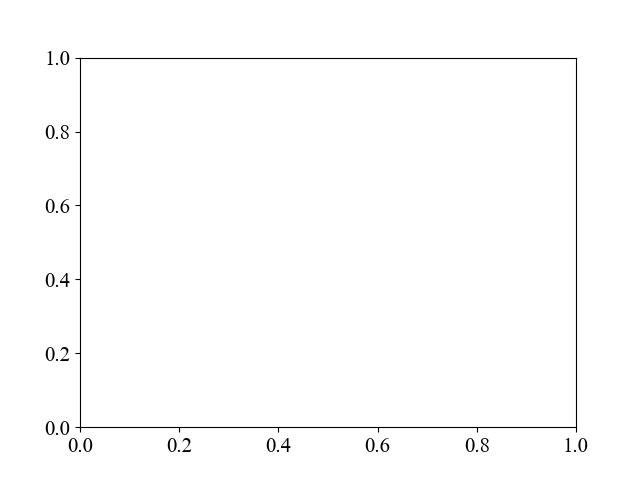

In [2]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(b_sls.F_u_design_to_mean_grid[0])), b_sls.F_u_design_to_mean_grid[0])
fig

$$\frac{F_\mathrm{limit}}{F_\mathrm{SLS}} = 1$$

$$\frac{F_\mathrm{limit}}{\eta F_\mathrm{ULS}} = 1$$

$$\frac{\eta F_\mathrm{ULS}}{F_\mathrm{limit}}= 1$$

$$\frac{F_\mathrm{ULS}}{F_\mathrm{limit}}= \frac{1}{\eta}$$

In [11]:
d = 270
l_limit_grid = b_sls.sl_grid * d / 250
w_SLS_qp_grid = b_sls.w_SLS_qp_grid

F_SLS_qp_design_grid = b_sls.F_SLS_qp_design_grid

eta = b_sls.sls_to_uls_ratio
F_ULS = b_sls.F_u_grid # F_Ed_u
F_SLS = eta * F_ULS # F_Ek_qs
F_limit = b_sls.F_s_grid # F_C
F_limit_design = b_sls.F_s_design_grid
rho = b_sls.rho_grid
sl = b_sls.sl_grid

xi = b_sls.F_u_design_to_mean_grid

z1 = F_ULS / F_limit - 1. / eta
z2 = F_ULS / F_limit - 1. / (eta * xi)
# util_levels = np.array([1, 0.8, 0.6, 0.4])

z3 = F_limit / F_SLS

z4 = w_SLS_qp_grid - l_limit_grid

z5 = F_SLS_qp_design_grid - F_limit
z6 = F_SLS_qp_design_grid - F_limit_design

F_limit[-1, -1], F_SLS[-1, -1]

(84.30606455955207, 243.8527558527743)

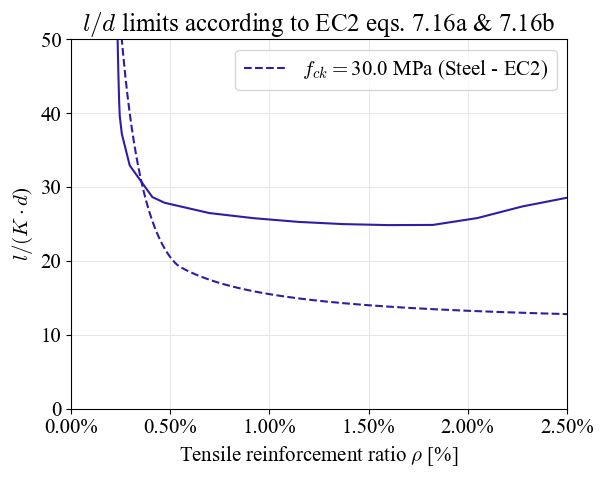

In [19]:
fig, ax = plt.subplots()

color = np.random.rand(3, )

# cs = ax.contour(rho, sl, z1, levels=[0], colors=[color])
# cs = ax.contour(rho, sl, z2, levels=[0], colors=[color])
# cs = ax.contour(rho, sl, z3, levels=[0.2, 0.4, 0.6, 0.8, 1], colors=[color])
# cs = ax.contour(rho, sl, 1/z3, levels=[0.2, 0.4, 0.6, 0.8, 1])

# cs = ax.contour(rho, sl, z4, levels=[0], colors=[color])

# cs = ax.contour(rho, sl, z5, levels=[0], colors=[color])

# cs = ax.contour(rho, sl, z6, levels=[0], colors=[color])

                
# cs = ax.contour(rho, sl, z3, levels=1 - util_levels, colors=[color])

# cs = ax.contour(rho, sl, z)
# cs.collections[0].set_label(label)

# Put values on lines
# ax.clabel(cs, inline=True, fontsize=10)

# p = cs.collections[0].get_paths()[0]
# v = p.vertices
# b_sls.rho = v[:, 0]
# b_sls.sl = v[:, 1]

# Draw EC2 curve
b_sls.plot_steel_sls_curves(ax, f_cks=[b_sls.f_ck],
                           axes_start_from_zero=True,
                           color=color)
# print(np.min(z), np.max(z))
fig

$$
\eta^\mathrm{FRP} = \frac{F^\mathrm{FRP}_\mathrm{C}}{F^\mathrm{FRP}_\mathrm{Ek,qp}}
$$

$$
\eta^\mathrm{steel} = \frac{F^\mathrm{steel}_\mathrm{C}}{F^\mathrm{steel}_\mathrm{Ek,qp}}
$$

$$
\eta = \frac{F^\mathrm{FRP}_\mathrm{C}}{F^\mathrm{steel}_\mathrm{C}}
$$

In [ ]:
EC2.get_f_ctm_fl(b_sls.f_ck, 300)

Parametric study is running...
f_ck: (30), parameter combination 0.0002 3.0
parameter combination 0.0002 7.2727272727272725
parameter combination 0.0002 11.545454545454545
parameter combination 0.0002 15.818181818181817
parameter combination 0.0002 20.09090909090909
parameter combination 0.0002 24.363636363636363
parameter combination 0.0002 28.636363636363633
parameter combination 0.0002 32.90909090909091
parameter combination 0.0002 37.18181818181818
parameter combination 0.0002 41.45454545454545
parameter combination 0.0002 45.72727272727273
parameter combination 0.0002 50.0
parameter combination 0.002454545454545455 3.0
parameter combination 0.002454545454545455 7.2727272727272725
parameter combination 0.002454545454545455 11.545454545454545
parameter combination 0.002454545454545455 15.818181818181817
parameter combination 0.002454545454545455 20.09090909090909
parameter combination 0.002454545454545455 24.363636363636363
parameter combination 0.002454545454545455 28.6363636363636

parameter combination 0.0002 7.2727272727272725
parameter combination 0.0002 11.545454545454545
parameter combination 0.0002 15.818181818181817
parameter combination 0.0002 20.09090909090909
parameter combination 0.0002 24.363636363636363
parameter combination 0.0002 28.636363636363633
parameter combination 0.0002 32.90909090909091
parameter combination 0.0002 37.18181818181818
parameter combination 0.0002 41.45454545454545
parameter combination 0.0002 45.72727272727273
parameter combination 0.0002 50.0
parameter combination 0.002454545454545455 3.0
parameter combination 0.002454545454545455 7.2727272727272725
parameter combination 0.002454545454545455 11.545454545454545
parameter combination 0.002454545454545455 15.818181818181817
parameter combination 0.002454545454545455 20.09090909090909
parameter combination 0.002454545454545455 24.363636363636363
parameter combination 0.002454545454545455 28.636363636363633
parameter combination 0.002454545454545455 32.90909090909091
parameter co

parameter combination 0.0002 11.545454545454545
parameter combination 0.0002 15.818181818181817
parameter combination 0.0002 20.09090909090909
parameter combination 0.0002 24.363636363636363
parameter combination 0.0002 28.636363636363633
parameter combination 0.0002 32.90909090909091
parameter combination 0.0002 37.18181818181818
parameter combination 0.0002 41.45454545454545
parameter combination 0.0002 45.72727272727273
parameter combination 0.0002 50.0
parameter combination 0.002454545454545455 3.0
parameter combination 0.002454545454545455 7.2727272727272725
parameter combination 0.002454545454545455 11.545454545454545
parameter combination 0.002454545454545455 15.818181818181817
parameter combination 0.002454545454545455 20.09090909090909
parameter combination 0.002454545454545455 24.363636363636363
parameter combination 0.002454545454545455 28.636363636363633
parameter combination 0.002454545454545455 32.90909090909091
parameter combination 0.002454545454545455 37.18181818181818

parameter combination 0.0002 15.818181818181817
parameter combination 0.0002 20.09090909090909
parameter combination 0.0002 24.363636363636363
parameter combination 0.0002 28.636363636363633
parameter combination 0.0002 32.90909090909091
parameter combination 0.0002 37.18181818181818
parameter combination 0.0002 41.45454545454545
parameter combination 0.0002 45.72727272727273
parameter combination 0.0002 50.0
parameter combination 0.002454545454545455 3.0
parameter combination 0.002454545454545455 7.2727272727272725
parameter combination 0.002454545454545455 11.545454545454545
parameter combination 0.002454545454545455 15.818181818181817
parameter combination 0.002454545454545455 20.09090909090909
parameter combination 0.002454545454545455 24.363636363636363
parameter combination 0.002454545454545455 28.636363636363633
parameter combination 0.002454545454545455 32.90909090909091
parameter combination 0.002454545454545455 37.18181818181818
parameter combination 0.002454545454545455 41.4

parameter combination 0.0002 15.818181818181817
parameter combination 0.0002 20.09090909090909
parameter combination 0.0002 24.363636363636363
parameter combination 0.0002 28.636363636363633
parameter combination 0.0002 32.90909090909091
parameter combination 0.0002 37.18181818181818
parameter combination 0.0002 41.45454545454545
parameter combination 0.0002 45.72727272727273
parameter combination 0.0002 50.0
parameter combination 0.002454545454545455 3.0
parameter combination 0.002454545454545455 7.2727272727272725
parameter combination 0.002454545454545455 11.545454545454545
parameter combination 0.002454545454545455 15.818181818181817
parameter combination 0.002454545454545455 20.09090909090909
parameter combination 0.002454545454545455 24.363636363636363
parameter combination 0.002454545454545455 28.636363636363633
parameter combination 0.002454545454545455 32.90909090909091
parameter combination 0.002454545454545455 37.18181818181818
parameter combination 0.002454545454545455 41.4

<lambdifygenerated-65>:2: RuntimeWarning: invalid value encountered in power
  return -select([less(eps, varepsilon_cu),less(eps, varepsilon_cy),less(eps, 0),less(eps, varepsilon_cr),less(eps, varepsilon_tu),True], [0,f_cd,f_cd*(1 - (-eps/varepsilon_cy + 1)**n),-E_ct*eps,-E_ct*mu*varepsilon_cr,0], default=nan)


parameter combination 0.006963636363636364 7.2727272727272725
parameter combination 0.006963636363636364 11.545454545454545
parameter combination 0.006963636363636364 15.818181818181817
parameter combination 0.006963636363636364 20.09090909090909
parameter combination 0.006963636363636364 24.363636363636363
parameter combination 0.006963636363636364 28.636363636363633
parameter combination 0.006963636363636364 32.90909090909091
parameter combination 0.006963636363636364 37.18181818181818
parameter combination 0.006963636363636364 41.45454545454545
parameter combination 0.006963636363636364 45.72727272727273
parameter combination 0.006963636363636364 50.0
parameter combination 0.00921818181818182 3.0
parameter combination 0.00921818181818182 7.2727272727272725
parameter combination 0.00921818181818182 11.545454545454545
parameter combination 0.00921818181818182 15.818181818181817
parameter combination 0.00921818181818182 20.09090909090909
parameter combination 0.00921818181818182 24.363

parameter combination 0.006963636363636364 11.545454545454545
parameter combination 0.006963636363636364 15.818181818181817
parameter combination 0.006963636363636364 20.09090909090909
parameter combination 0.006963636363636364 24.363636363636363
parameter combination 0.006963636363636364 28.636363636363633
parameter combination 0.006963636363636364 32.90909090909091
parameter combination 0.006963636363636364 37.18181818181818
parameter combination 0.006963636363636364 41.45454545454545
parameter combination 0.006963636363636364 45.72727272727273
parameter combination 0.006963636363636364 50.0
parameter combination 0.00921818181818182 3.0
parameter combination 0.00921818181818182 7.2727272727272725
parameter combination 0.00921818181818182 11.545454545454545
parameter combination 0.00921818181818182 15.818181818181817
parameter combination 0.00921818181818182 20.09090909090909
parameter combination 0.00921818181818182 24.363636363636363
parameter combination 0.00921818181818182 28.6363

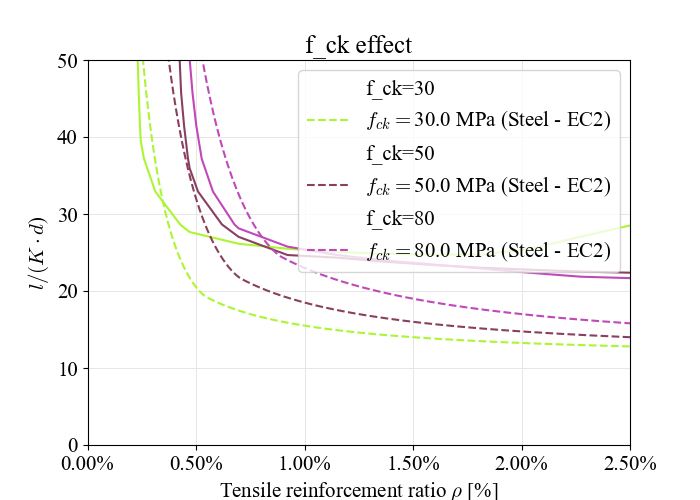

In [6]:
params_config = [
#     ['f_ctm', b_sls, [1* EC2.get_f_ctm_fl(b_sls.f_ck, 300), 2* EC2.get_f_ctm_fl(b_sls.f_ck, 300)]],
#     ['f_ctm', b_sls, [0, 2, 5]],
#     [['f_ck', b_sls, [30, 50, 70]], ['f_ctm', b_sls, [7.5, 10.58, 12]]],
#         [['f_ck', b_sls, [10]], ['f_ctm', b_sls, [4]]],
    ['f_ck', b_sls, [30, 50, 80]],
#     ['sls_to_uls_ratio', b_sls, [0.59, 0.51]]
#     ['concrete_law', b_sls, ['EC2 with plateau', 'EC2']],
#     ['n_i', b_sls, [30]],
#     ['dense_quarter', b_sls, [True, False]],
#     ['use_f_ctm_fl', b_sls, [True, False]],
#     ['apply_material_factors', b_sls, [True, False]],
#     ['rein_type', b_sls, ['carbon_grid', 'carbon_rebars']],
#     ['H', b_sls.dp.mc.cross_section_shape_, [200, 400, 600]],
#     ['B', b_sls.dp.mc.cross_section_shape_, [1000, 200]],
#     [['B', b_sls.dp.mc.cross_section_shape_, [1000, 200, 300]], ['H', b_sls.dp.mc.cross_section_shape_, [300, 400, 700]]],
#     [['f_t', b_sls.dp.mc.cross_section_layout.items[0].matmod_, [1000]], ['E', b_sls.dp.mc.cross_section_layout.items[0].matmod_, [100000]]],
    ]
fig = ps.run(params_config, savefig=True)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
b_sls.dp.plot_fw_with_fmax(ax)
# fig.savefig('carbon_sl_10_rho_0.28.pdf')
fig

In [ ]:
# sls.plot_F_u()
sls.plot_F_u(bending_shear_diff = True)
# sls.plot_F_u(load='shear')


# Achse x: Bewehrungsgrad rho [%]
# Achse y: Biegeschlankheit l/d [-]

## Tensile vs compression failure zones

In [ ]:
dp = b_sls.dp
mc = dp.mc
# for rho in b_sls.rho_range:
#     area_g = mc.cross_section_shape_.get_cs_area()
#     A_j_g = rho * area_g
#     mc.cross_section_layout.items[0].A = A_j_g
#     mc.M_t / mc.M_scale

In [ ]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(b_sls.rho_grid, b_sls.sl_grid, b_sls.F_u_grid,
                       linewidth=0, antialiased=False, cmap=cm.coolwarm)

In [ ]:
np.linspace(0, 5000, 30)
fig, ax = plt.subplots()
# z = b_sls.F_u_grid / b_sls.F_s_grid - 1. / b_sls.sls_to_uls_ratio
z = b_sls.F_u_grid
cs = ax.contour(b_sls.rho_grid, b_sls.sl_grid, z, levels=[0, 10, 20, 50, 80, 100, 150, 300, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
ax.clabel(cs, inline=True, fontsize=10)

### 1. EC2 - Steel

In [ ]:
b_sls.n_i = 10
b_sls.rein_type = 'steel'
b_sls.dense_quarter = False

### 2. EC2 - Carbon

In [ ]:
b_sls.n_i = 10
b_sls.rein_type = 'carbon_grid'
b_sls.dense_quarter = True